In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [44]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',
                 encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
342683,0,2015306906,Wed Jun 03 04:18:19 PDT 2009,NO_QUERY,tiffanysabrina,Just sprayed around myself to get rid of awful...
1328258,4,2015490625,Wed Jun 03 04:48:13 PDT 2009,NO_QUERY,mbchandar,cont... Eccentric personality. 11 years of bad...
1478957,4,2066574603,Sun Jun 07 10:46:36 PDT 2009,NO_QUERY,ojilles,Sushi-time! cant go wrong with that
1143099,4,1977389341,Sat May 30 20:53:05 PDT 2009,NO_QUERY,soccerpnut779,Yellowcard is dominating my ear drums.. .
1041685,4,1957111111,Thu May 28 23:32:55 PDT 2009,NO_QUERY,babicuzE,"@IAMACEHOOD GET IT HOOD BOY, I RIDE OR DIE FOR..."


In [45]:
print('length of data is', len(df))

length of data is 1600000


In [46]:
df.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [48]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

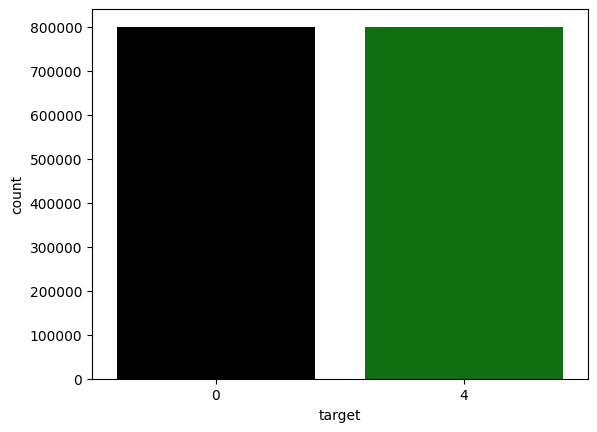

In [49]:
import seaborn as sns

custom_palette = ["black", "green"]
sns.countplot(data=df, x='target', palette=custom_palette)


In [50]:
data=df[['text','target']]
data.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [51]:
data['target'] = data['target'].replace(4,1) # 1 positive sentiment
data['target'].value_counts()

/tmp/ipykernel_32/2896486749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1) # 1 positive sentiment


target
0    800000
1    800000
Name: count, dtype: int64

In [52]:
data_pos = data[data['target'] == 1]
#Separating positive and negative tweets
data_neg = data[data['target'] == 0]
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
dataset = pd.concat([data_pos, data_neg])
dataset.shape

(40000, 2)

In [53]:
dataset.head()

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1


In [54]:
dataset['text']=dataset['text'].str.lower()
dataset.head()

,text,target
800000,i love @health4uandpets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@darealsunisakim thanks for the twitter add, s...",1
800003,being sick can be really cheap when it hurts t...,1
800004,@lovesbrooklyn2 he has that effect on everyone,1


In [55]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [56]:
#remove stopwords
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [57]:
#code to clean and remove puncutation
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [58]:
#Cleaning and removing repeating characters
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [59]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [60]:
#Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [61]:
#token get for next tweet
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\s+', gaps = True)
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)

In [62]:
dataset['text'].tail()

19995    [not, much, time, off, weekend, work, trip, ma...
19996                                 [one, day, holidays]
19997                [feeling, right, hate, damn, humprey]
19998    [geezi, hv, read, whole, book, personality, ty...
19999    [threw, sign, donnie, bent, over, get, but, th...
Name: text, dtype: object

In [63]:
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [64]:
#stemming 
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [65]:
dataset.head()

,text,target
800000,"[love, healthuandpets, u, guys, r, best]",1
800001,"[im, meeting, one, besties, tonight, cant, wai...",1
800002,"[darealsunisakim, thanks, twitter, add, sunisa...",1
800003,"[sick, really, cheap, hurts, much, eat, real, ...",1
800004,"[lovesbrooklyn, effect, everyone]",1


In [66]:
dataset[dataset['target']==0]['text']

0        [switchfoot, httptwitpiccomzl, a, s, bummer, s...
1        [upset, cant, update, facebook, texting, it, m...
2        [kenichan, dived, many, times, ball, managed, ...
3                  [whole, body, feels, itchy, like, fire]
4        [nationwideclass, no, its, not, behaving, all,...
                               ...                        
19995    [not, much, time, off, weekend, work, trip, ma...
19996                                 [one, day, holidays]
19997                [feeling, right, hate, damn, humprey]
19998    [geezi, hv, read, whole, book, personality, ty...
19999    [threw, sign, donnie, bent, over, get, but, th...
Name: text, Length: 20000, dtype: object

(-0.5, 1599.5, 799.5, -0.5)

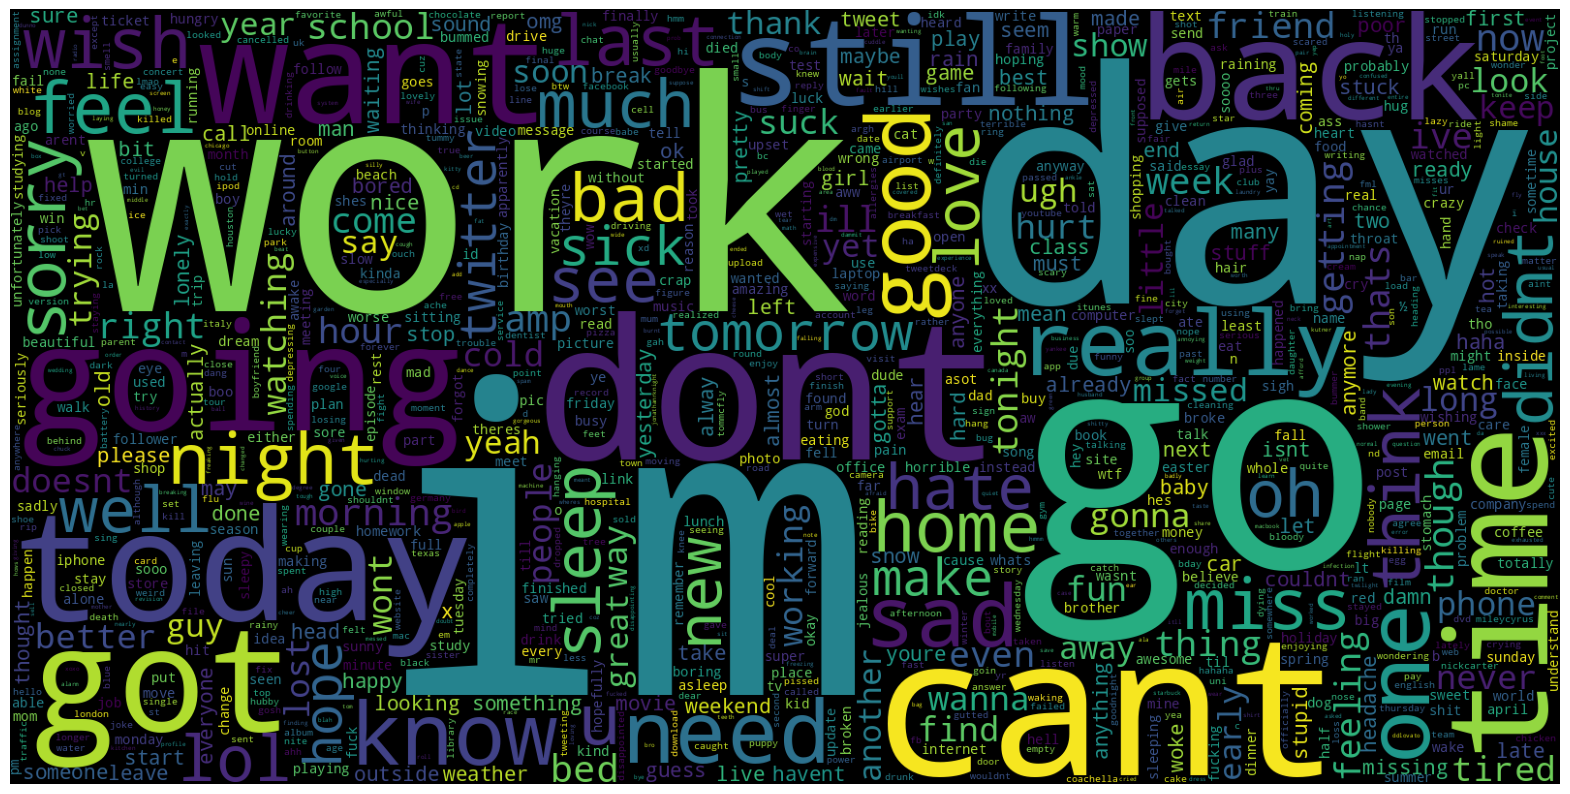

In [67]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
data_neg = dataset[dataset['target']==0]['text'].apply(lambda x: ' '.join(x) )
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

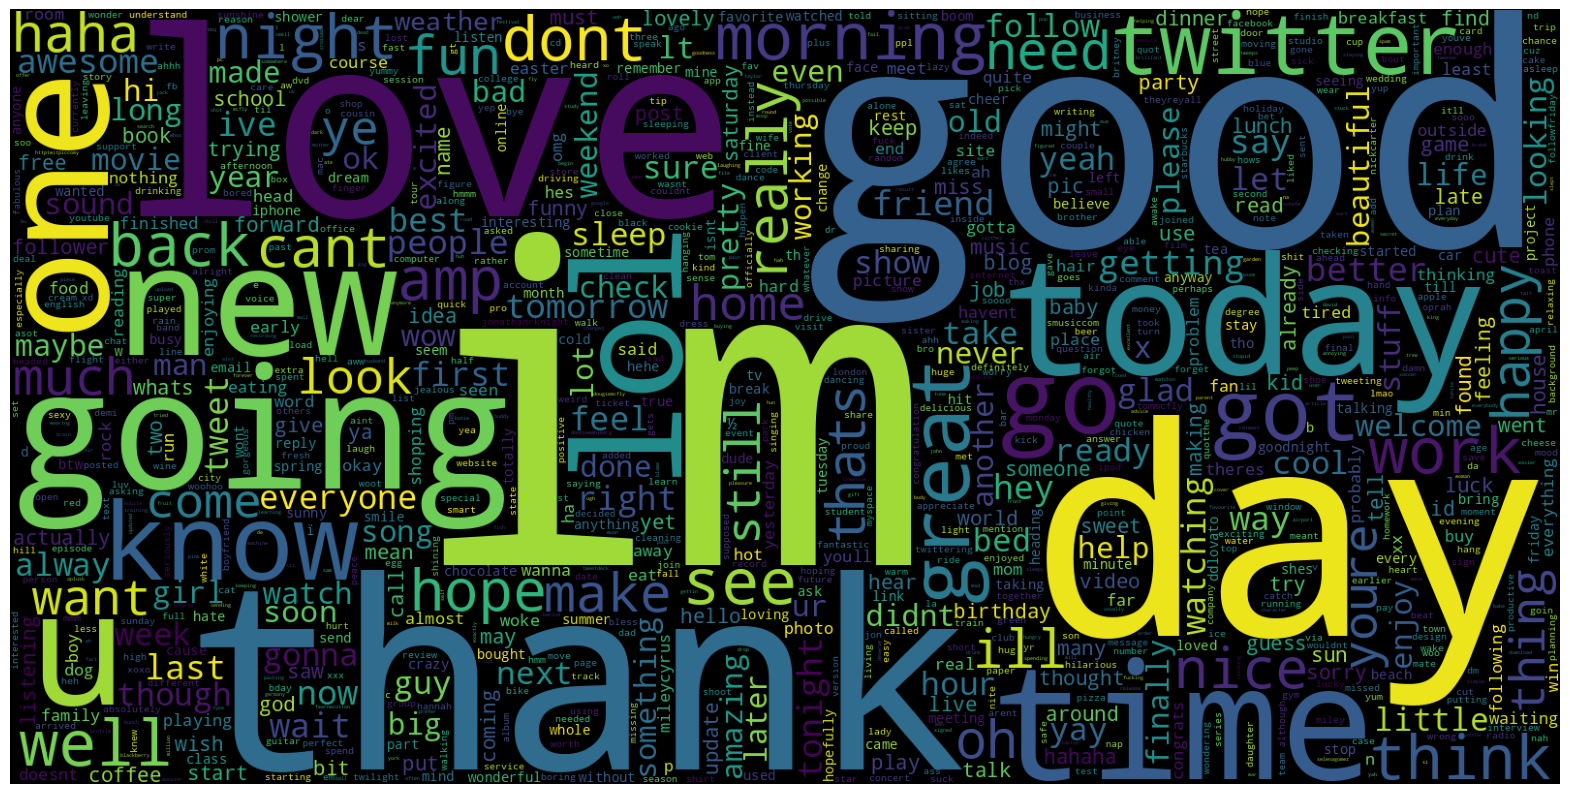

In [68]:
data_neg = dataset[dataset['target']==1]['text'].apply(lambda x: ' '.join(x) )
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')

In [69]:
new_data=dataset
new_data['text'] = dataset['text'].apply(lambda x: ' '.join(x) )
new_data.head()

,text,target
800000,love healthuandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl ...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn effect everyone,1


In [70]:
X=new_data.text
y=new_data.target

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10,
                                                    random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(40000,)
(36000,)
(4000,)


In [72]:
#Transforming Dataset using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  5000


In [73]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(36000, 5000)
(4000, 5000)


In [78]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix
test_acc=accuracy_score(y_test,y_pred)
print(test_acc)
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

0.77325
[[1497  506]
 [ 401 1596]]


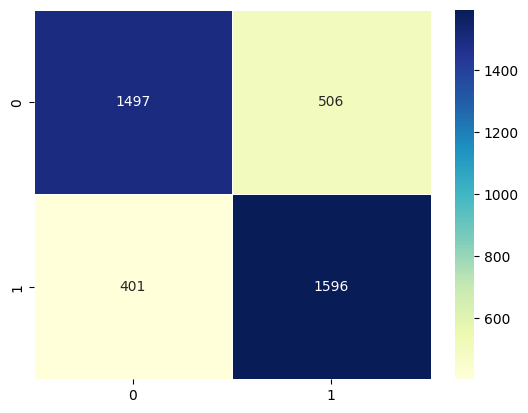

In [79]:
import seaborn as sns
custom_cmap = "YlGnBu"
sns.heatmap(cfm, annot=True, fmt='', linewidths=0.5, cmap=custom_cmap)
plt.show()

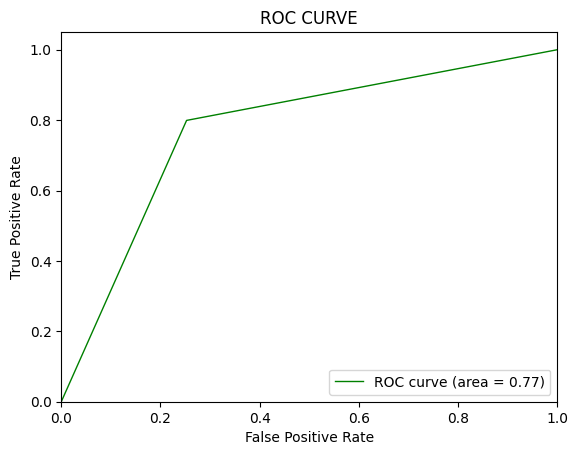

In [81]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='green', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()